# Project: Investigate TMDb Dataset 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I choose the TMDb movie data set for data analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I would like to find other intresting patterns in the dataset. 
>
> The two questions I will be exploring are:

>• **What is the average runtime of all movies?**

>• **Is the profit of movies has increased over the years?**

In [138]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [139]:
# Load your data and print out a few lines. Perform operations to inspect data

df = pd.read_csv('tmdb-movies.csv')

#   types and look for instances of missing or possibly errant data.

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [140]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [142]:
df.shape

(10866, 21)

>After uploading our data in our dataframe, we can see that we have 10866 rows, and 21 columns

In [143]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [144]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>After investigating the data we can see that some columns need to be removed which are :
**id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count, and vote_average**

### Data Cleaning

>After reviewing the dataset I have to delete unused data to make it easier to analysis the dataset.

In [145]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

unwanted_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

df.drop(unwanted_col, axis=1,inplace=True)

In [146]:
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


## Spliting cast members from the cast column

>The cast members are stacked in one column, so for best practice and better analysis, we need to split the cast column into 5 casts, since the highest casts in a movie was 5. The condition was to use the DataFrame.Split method with the condition of seperating the '|' between each cast members.

**I will create a new dataframe which has the cast column with the split function, i choose 5 cast since the highest cast members in a movie was 5**

In [147]:
#Reference: https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/

# new data frame with split value columns 
new = df["cast"].str.split("|", n = 1, expand = True) 
new = df["cast"].str.split("|", n = 2, expand = True) 
new = df["cast"].str.split("|", n = 3, expand = True) 
new = df["cast"].str.split("|", n = 4, expand = True) 
new = df["cast"].str.split("|", n = 5, expand = True) 

In [148]:
new.head()

,0,1,2,3,4
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


> The new data frame has the cast members splited nicely, now we need to load the new data frame into our pervious data frame which is df

In [149]:
# Loading each cast column in the df data frame
df["cast_1"]= new[0] 
df["cast_2"]= new[1] 
df["cast_3"]= new[2] 
df["cast_4"]= new[3] 
df["cast_5"]= new[4]

In [150]:
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,cast_1,cast_2,cast_3,cast_4,cast_5
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


> Great!! now we need to drop the old cast column, which has all the casts for each movie in one cell

In [151]:
df.drop(columns =["cast"], inplace = True)

In [152]:
df.head()

,budget,revenue,original_title,director,tagline,runtime,genres,release_date,release_year,cast_1,cast_2,cast_3,cast_4,cast_5
0,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,150000000,378436354,Mad Max: Fury Road,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,110000000,295238201,Insurgent,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,190000000,1506249360,Furious 7,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


> Also, we need to split the genres which is in one cell and sperated by '|'

In [153]:
new_g = df["genres"].str.split("|", n = 1, expand = True) 
new_g = df["genres"].str.split("|", n = 2, expand = True) 
new_g = df["genres"].str.split("|", n = 3, expand = True) 
new_g = df["genres"].str.split("|", n = 4, expand = True) 
new_g = df["genres"].str.split("|", n = 5, expand = True) 

In [154]:
new_g.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [155]:
# Loading each genres column in the df data frame
df["genre_1"]= new_g[0] 
df["genre_2"]= new_g[1] 
df["genre_3"]= new_g[2] 
df["genre_4"]= new_g[3] 
df["genre_5"]= new_g[4]

In [156]:
df.head()

,budget,revenue,original_title,director,tagline,runtime,genres,release_date,release_year,cast_1,cast_2,cast_3,cast_4,cast_5,genre_1,genre_2,genre_3,genre_4,genre_5
0,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Action,Adventure,Science Fiction,Thriller,None
1,150000000,378436354,Mad Max: Fury Road,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Action,Adventure,Science Fiction,Thriller,None
2,110000000,295238201,Insurgent,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Adventure,Science Fiction,Thriller,None,None
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Action,Adventure,Science Fiction,Fantasy,None
4,190000000,1506249360,Furious 7,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Action,Crime,Thriller,None,None


>After spliting genres in genre_1, genre_2, etc. We need to drop the genres column

In [157]:
df.drop(columns =["genres"], inplace = True)

In [158]:
df.head()

,budget,revenue,original_title,director,tagline,runtime,release_date,release_year,cast_1,cast_2,cast_3,cast_4,cast_5,genre_1,genre_2,genre_3,genre_4,genre_5
0,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,6/9/15,2015,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Action,Adventure,Science Fiction,Thriller,None
1,150000000,378436354,Mad Max: Fury Road,George Miller,What a Lovely Day.,120,5/13/15,2015,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Action,Adventure,Science Fiction,Thriller,None
2,110000000,295238201,Insurgent,Robert Schwentke,One Choice Can Destroy You,119,3/18/15,2015,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Adventure,Science Fiction,Thriller,None,None
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,136,12/15/15,2015,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Action,Adventure,Science Fiction,Fantasy,None
4,190000000,1506249360,Furious 7,James Wan,Vengeance Hits Home,137,4/1/15,2015,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Action,Crime,Thriller,None,None


In [159]:
#Checking number of duplicates

df.duplicated().sum()

1

>We have one duplicated in one row, let's see which row has duplicated row

In [160]:
df[df.duplicated(keep=False)]

,budget,revenue,original_title,director,tagline,runtime,release_date,release_year,cast_1,cast_2,cast_3,cast_4,cast_5,genre_1,genre_2,genre_3,genre_4,genre_5
2089,30000000,967000,TEKKEN,Dwight H. Little,Survival is no game,92,3/20/10,2010,Jon Foo,Kelly Overton,Cary-Hiroyuki Tagawa,Ian Anthony Dale,Luke Goss,Crime,Drama,Action,Thriller,Science Fiction
2090,30000000,967000,TEKKEN,Dwight H. Little,Survival is no game,92,3/20/10,2010,Jon Foo,Kelly Overton,Cary-Hiroyuki Tagawa,Ian Anthony Dale,Luke Goss,Crime,Drama,Action,Thriller,Science Fiction


In [161]:
df.drop_duplicates(inplace = True)

In [162]:
df.duplicated().sum()

0

In [163]:
df.dtypes

budget             int64
revenue            int64
original_title    object
director          object
tagline           object
runtime            int64
release_date      object
release_year       int64
cast_1            object
cast_2            object
cast_3            object
cast_4            object
cast_5            object
genre_1           object
genre_2           object
genre_3           object
genre_4           object
genre_5           object
dtype: object

>The release_date column datatype need to be changed from object to Datetime format 

In [164]:
df.dtypes

budget             int64
revenue            int64
original_title    object
director          object
tagline           object
runtime            int64
release_date      object
release_year       int64
cast_1            object
cast_2            object
cast_3            object
cast_4            object
cast_5            object
genre_1           object
genre_2           object
genre_3           object
genre_4           object
genre_5           object
dtype: object

In [165]:
df[df['runtime']==0]

,budget,revenue,original_title,director,tagline,runtime,release_date,release_year,cast_1,cast_2,cast_3,cast_4,cast_5,genre_1,genre_2,genre_3,genre_4,genre_5
92,0,0,Mythica: The Necromancer,A. Todd Smith,NaN,0,12/19/15,2015,Melanie Stone,Adam Johnson,Kevin Sorbo,Nicola Posener,Jake Stormoen,Fantasy,Action,Adventure,None,None
334,0,0,Ronaldo,Anthony Wonke,Astonishing. Intimate. Definitive.,0,11/9/15,2015,Cristiano Ronaldo,None,None,None,None,Documentary,None,None,None,None
410,0,0,Anarchy Parlor,Kenny Gage|Devon Downs,NaN,0,1/1/15,2015,Robert LaSardo,Jordan James Smith,Sara Fabel,Tiffany DeMarco,Claire Garvey,Horror,None,None,None,None
445,0,0,The Exorcism of Molly Hartley,Steven R. Monroe,NaN,0,10/9/15,2015,Sarah Lind,Devon Sawa,Gina Holden,Peter MacNeill,Tom McLaren,Horror,None,None,None,None
486,0,0,If There Be Thorns,Nancy Savoca,NaN,0,4/5/15,2015,Heather Graham,Jason Lewis,Rachael Carpani,Mason Cook,Emily Tennant,TV Movie,Drama,None,None,None
595,0,0,Deep Dark,Michael Medaglia,NaN,0,1/1/15,2015,Sean McGrath,Denise Poirier,Anne Sorce,Tabor Helton,Monica Graves,Horror,None,None,None,None
616,0,0,The Outfield,Michael Goldfine,NaN,0,11/10/15,2015,Cameron Dallas,Hamilton Nash Grier,Olivia Stuck,Joey Bragg,Caroline Sunshine,Drama,Comedy,None,None,None
1241,0,0,Dance-Off,NaN,NaN,0,1/1/14,2014,Kathryn McCormick,Shane Harper,Finola Hughes,Carolyn Hennesy,Erin Cardillo,Romance,Music,Comedy,None,None
1289,3250000,0,Treehouse,Michael G. Bartlett,No kids allowed,0,10/20/14,2014,J. Michael Trautmann,Dana Melanie,Daniel Fredrick,Clint James,Victoria Spencer Smith,Thriller,Horror,Mystery,None,None
1293,0,0,Tim Maia,Mauro Lima,Original language PORTUGUESE,0,10/30/14,2014,Robson Nunes,BabÃº Santana,Alinne Moraes,CauÃ£ Reymond,Valdineia Soriano,Documentary,Drama,Music,None,None


>Here we can see that some movies have 0 in runtime, we need to change the zeros to NAN

In [166]:
df['runtime']= df['runtime'].replace(0, np.NAN)

In [167]:
df.loc[92]

budget                                   0
revenue                                  0
original_title    Mythica: The Necromancer
director                     A. Todd Smith
tagline                                NaN
runtime                                NaN
release_date                      12/19/15
release_year                          2015
cast_1                       Melanie Stone
cast_2                        Adam Johnson
cast_3                         Kevin Sorbo
cast_4                      Nicola Posener
cast_5                       Jake Stormoen
genre_1                            Fantasy
genre_2                             Action
genre_3                          Adventure
genre_4                               None
genre_5                               None
Name: 92, dtype: object

In [168]:
df[df['budget']==0]

,budget,revenue,original_title,director,tagline,runtime,release_date,release_year,cast_1,cast_2,cast_3,cast_4,cast_5,genre_1,genre_2,genre_3,genre_4,genre_5
30,0,29355203,Mr. Holmes,Bill Condon,The man behind the myth,103.0,6/19/15,2015,Ian McKellen,Milo Parker,Laura Linney,Hattie Morahan,Patrick Kennedy,Mystery,Drama,None,None,None
36,0,22354572,Solace,Afonso Poyart,"A serial killer who can see your future, a psy...",101.0,9/3/15,2015,Abbie Cornish,Jeffrey Dean Morgan,Colin Farrell,Anthony Hopkins,Marley Shelton,Crime,Drama,Mystery,None,None
72,0,45895,Beyond the Reach,Jean-Baptiste LÃ©onetti,NaN,95.0,4/17/15,2015,Michael Douglas,Jeremy Irvine,Hanna Mangan Lawrence,Ronny Cox,Martin Palmer,Thriller,None,None,None,None
74,0,0,Mythica: The Darkspore,Anne K. Black,NaN,108.0,6/24/15,2015,Melanie Stone,Kevin Sorbo,Adam Johnson,Jake Stormoen,Rocky Myers,Action,Adventure,Fantasy,None,None
75,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,105.0,6/12/15,2015,Thomas Mann,RJ Cyler,Olivia Cooke,Connie Britton,Nick Offerman,Comedy,Drama,None,None,None
88,0,2000000,Equals,Drake Doremus,Find your equal.,101.0,9/4/15,2015,Kristen Stewart,Nicholas Hoult,Guy Pearce,Jacki Weaver,Bel Powley,Drama,Romance,Science Fiction,None,None
92,0,0,Mythica: The Necromancer,A. Todd Smith,NaN,NaN,12/19/15,2015,Melanie Stone,Adam Johnson,Kevin Sorbo,Nicola Posener,Jake Stormoen,Fantasy,Action,Adventure,None,None
95,0,233755553,Alvin and the Chipmunks: The Road Chip,Walt Becker,Fast & furry-ous,92.0,12/17/15,2015,Jason Lee,Justin Long,Bella Thorne,Matthew Gray Gubler,Jesse McCartney,Adventure,Animation,Comedy,Family,None
100,0,0,Frozen Fever,Chris Buck|Jennifer Lee,NaN,8.0,3/9/15,2015,Kristen Bell,Idina Menzel,Jonathan Groff,Josh Gad,Chris Williams,Adventure,Animation,Family,None,None
101,0,0,High-Rise,Ben Wheatley,Leave the real world behind,119.0,9/26/15,2015,Tom Hiddleston,Sienna Miller,Jeremy Irons,Luke Evans,Elisabeth Moss,Action,Drama,Science Fiction,None,None


>Some cells in the budget and the revenue column have a value of zero, dont want to drop these rows becuase i will do analysis other than calculating the profit.
So the best choice is to fill the zero values with NaN, because filling in the mean or max wont give us accurate insight.

In [169]:
df['budget'].replace(0, np.nan, inplace=True)

In [170]:
df['revenue'].replace(0, np.nan, inplace=True)

In [171]:
df

,budget,revenue,original_title,director,tagline,runtime,release_date,release_year,cast_1,cast_2,cast_3,cast_4,cast_5,genre_1,genre_2,genre_3,genre_4,genre_5
0,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,The park is open.,124.0,6/9/15,2015,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Action,Adventure,Science Fiction,Thriller,None
1,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,What a Lovely Day.,120.0,5/13/15,2015,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Action,Adventure,Science Fiction,Thriller,None
2,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,One Choice Can Destroy You,119.0,3/18/15,2015,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Adventure,Science Fiction,Thriller,None,None
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,136.0,12/15/15,2015,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Action,Adventure,Science Fiction,Fantasy,None
4,190000000.0,1.506249e+09,Furious 7,James Wan,Vengeance Hits Home,137.0,4/1/15,2015,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Action,Crime,Thriller,None,None
5,135000000.0,5.329505e+08,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",156.0,12/25/15,2015,Leonardo DiCaprio,Tom Hardy,Will Poulter,Domhnall Gleeson,Paul Anderson,Western,Drama,Adventure,Thriller,None
6,155000000.0,4.406035e+08,Terminator Genisys,Alan Taylor,Reset the future,125.0,6/23/15,2015,Arnold Schwarzenegger,Jason Clarke,Emilia Clarke,Jai Courtney,J.K. Simmons,Science Fiction,Action,Thriller,Adventure,None
7,108000000.0,5.953803e+08,The Martian,Ridley Scott,Bring Him Home,141.0,9/30/15,2015,Matt Damon,Jessica Chastain,Kristen Wiig,Jeff Daniels,Michael PeÃ±a,Drama,Adventure,Science Fiction,None,None
8,74000000.0,1.156731e+09,Minions,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",91.0,6/17/15,2015,Sandra Bullock,Jon Hamm,Michael Keaton,Allison Janney,Steve Coogan,Family,Animation,Adventure,Comedy,None
9,175000000.0,8.537086e+08,Inside Out,Pete Docter,Meet the little voices inside your head.,94.0,6/9/15,2015,Amy Poehler,Phyllis Smith,Richard Kind,Bill Hader,Lewis Black,Comedy,Animation,Family,None,None


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the average runtime of all movies?)

>First we need to look for the histograms of all the data

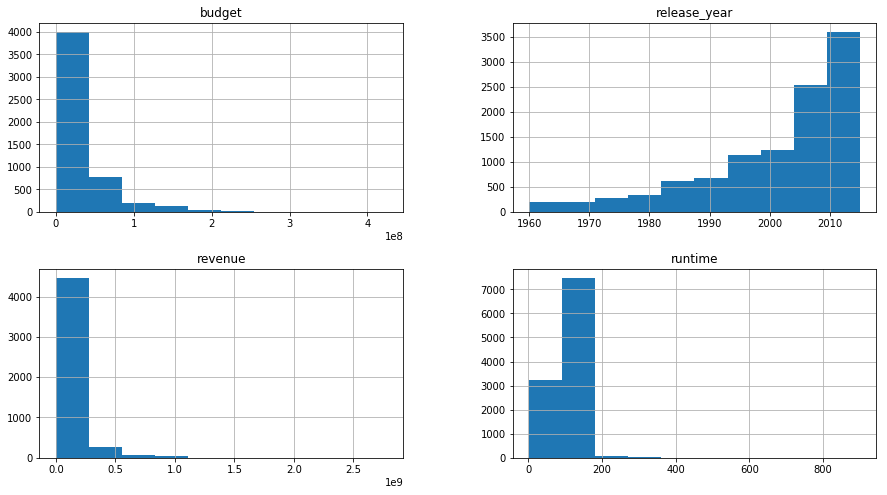

In [172]:
df.hist(figsize=(15,8));

In [173]:
df['runtime'].mean()

102.3638545320288

In [174]:
df['runtime'].median()

99.0

In [175]:
df['runtime'].describe()

count    10834.000000
mean       102.363855
std         30.948225
min          2.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

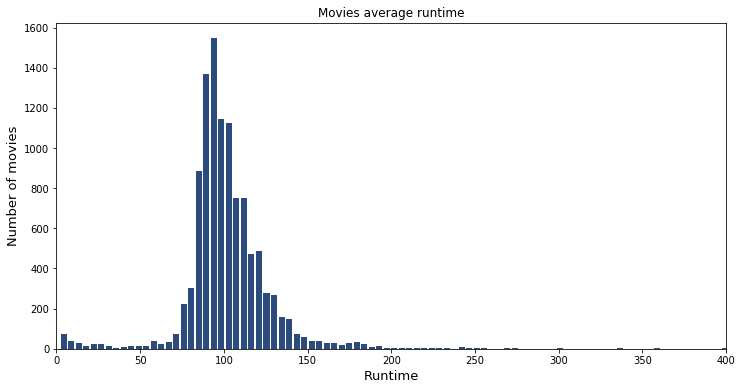

In [176]:
ax1=df['runtime'].plot(kind='hist',rwidth = 0.8, bins=200, figsize=(12,6), title='Movies average runtime', color='#2b4b7c')
#plt.xlabel('Runtime')
ax1.set_xlim(0,400)
ax1.set_xlabel("Runtime", fontsize = 13)
ax1.set_ylabel("Number of movies", fontsize = 13)
plt.show()

> We can observe from the graph, mean, and median that the disturbution of the run time is positively right-skewed distribution.

>Mean = 102.34, Median = 99

In [177]:
run= df.groupby('release_year').sum()['runtime']

In [178]:
run

release_year
1960     3541.0
1961     3702.0
1962     3979.0
1963     3785.0
1964     4587.0
1965     4136.0
1966     4917.0
1967     4198.0
1968     4184.0
1969     3304.0
1970     4594.0
1971     5925.0
1972     4078.0
1973     5694.0
1974     4964.0
1975     4724.0
1976     5138.0
1977     6105.0
1978     7155.0
1979     6385.0
1980     8385.0
1981     8681.0
1982     8418.0
1983     8240.0
1984    10864.0
1985    12463.0
1986    12092.0
1987    12646.0
1988    14760.0
1989    14355.0
1990    13946.0
1991    13980.0
1992    14235.0
1993    19068.0
1994    19672.0
1995    18821.0
1996    21564.0
1997    20449.0
1998    22063.0
1999    24385.0
2000    23558.0
2001    26144.0
2002    28426.0
2003    28291.0
2004    32347.0
2005    37378.0
2006    41487.0
2007    43980.0
2008    49739.0
2009    52261.0
2010    47987.0
2011    52878.0
2012    57607.0
2013    63293.0
2014    68832.0
2015    60620.0
Name: runtime, dtype: float64

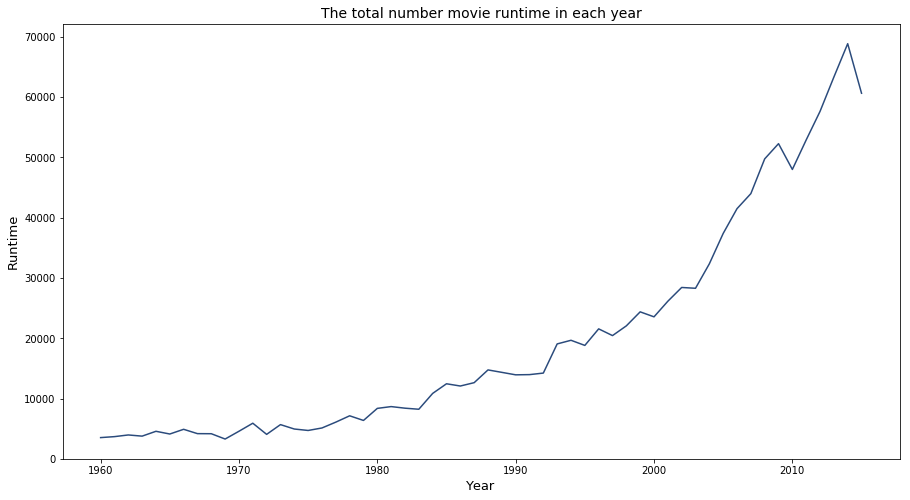

In [179]:
plt.figure(figsize=(15,8))
plt.plot(run, color='#2b4b7c')

plt.xlabel('Year', fontsize = 13)
plt.ylabel('Runtime', fontsize = 13)
plt.title('The total number movie runtime in each year', fontsize = 14)

plt.show()

>This line graph shows the total runtime duration of all the movies produced in each year, we can observe that after the year 1980, there are many movies have been produced, in which the the sum of runtime for all movies in each year is increasing dramatically until the year 2014, then in 2015 it decreased by 6.3%.

Text(0,0.5,'Runtime')

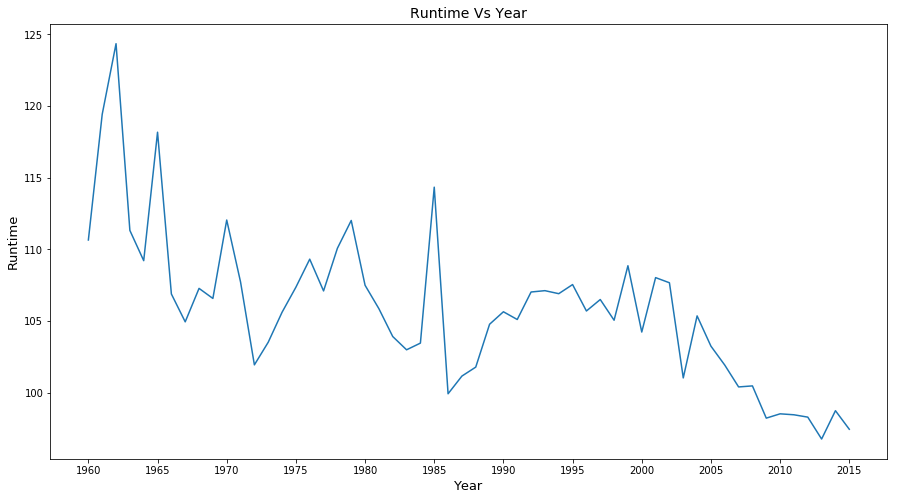

In [180]:
plt.figure(figsize=(15,8))
df.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))
plt.title("Runtime Vs Year",fontsize = 14)

plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)

>Movie duration is decreasing from year to the next. Movies with long run time have less profit than movies with less run time (**Check question 2 for more explanation**) because it is boring to watch a movie with long duration from 2.5 and above.

### Research Question 2  (Is the profit of movies has increased over the years? )

>First we need to calculate the profit for each movie, then we need to see if movie profits more in each year. Is there a high demand for movies in the last 10 years?

In [181]:
df['Profit'] = df['revenue'] - df['budget']

df

,budget,revenue,original_title,director,tagline,runtime,release_date,release_year,cast_1,cast_2,cast_3,cast_4,cast_5,genre_1,genre_2,genre_3,genre_4,genre_5,Profit
0,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,The park is open.,124.0,6/9/15,2015,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Action,Adventure,Science Fiction,Thriller,None,1.363529e+09
1,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,What a Lovely Day.,120.0,5/13/15,2015,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Action,Adventure,Science Fiction,Thriller,None,2.284364e+08
2,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,One Choice Can Destroy You,119.0,3/18/15,2015,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Adventure,Science Fiction,Thriller,None,None,1.852382e+08
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,136.0,12/15/15,2015,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Action,Adventure,Science Fiction,Fantasy,None,1.868178e+09
4,190000000.0,1.506249e+09,Furious 7,James Wan,Vengeance Hits Home,137.0,4/1/15,2015,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Action,Crime,Thriller,None,None,1.316249e+09
5,135000000.0,5.329505e+08,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",156.0,12/25/15,2015,Leonardo DiCaprio,Tom Hardy,Will Poulter,Domhnall Gleeson,Paul Anderson,Western,Drama,Adventure,Thriller,None,3.979505e+08
6,155000000.0,4.406035e+08,Terminator Genisys,Alan Taylor,Reset the future,125.0,6/23/15,2015,Arnold Schwarzenegger,Jason Clarke,Emilia Clarke,Jai Courtney,J.K. Simmons,Science Fiction,Action,Thriller,Adventure,None,2.856035e+08
7,108000000.0,5.953803e+08,The Martian,Ridley Scott,Bring Him Home,141.0,9/30/15,2015,Matt Damon,Jessica Chastain,Kristen Wiig,Jeff Daniels,Michael PeÃ±a,Drama,Adventure,Science Fiction,None,None,4.873803e+08
8,74000000.0,1.156731e+09,Minions,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",91.0,6/17/15,2015,Sandra Bullock,Jon Hamm,Michael Keaton,Allison Janney,Steve Coogan,Family,Animation,Adventure,Comedy,None,1.082731e+09
9,175000000.0,8.537086e+08,Inside Out,Pete Docter,Meet the little voices inside your head.,94.0,6/9/15,2015,Amy Poehler,Phyllis Smith,Richard Kind,Bill Hader,Lewis Black,Comedy,Animation,Family,None,None,6.787086e+08


In [182]:
df.dtypes

budget            float64
revenue           float64
original_title     object
director           object
tagline            object
runtime           float64
release_date       object
release_year        int64
cast_1             object
cast_2             object
cast_3             object
cast_4             object
cast_5             object
genre_1            object
genre_2            object
genre_3            object
genre_4            object
genre_5            object
Profit            float64
dtype: object

In [183]:
#This groupby function gets the count of movies created in each year

data=df.groupby('release_year')['original_title'].count()

In [184]:
type(data)

pandas.core.series.Series

In [185]:
data=data.to_frame() 

In [186]:
data

,original_title
release_year,
1960,32
1961,31
1962,32
1963,34
1964,42
1965,35
1966,46
1967,40
1968,39


>This dataframe shows the total number of movies produced in each year, So as a next step we need to visualize it to see the trends. 

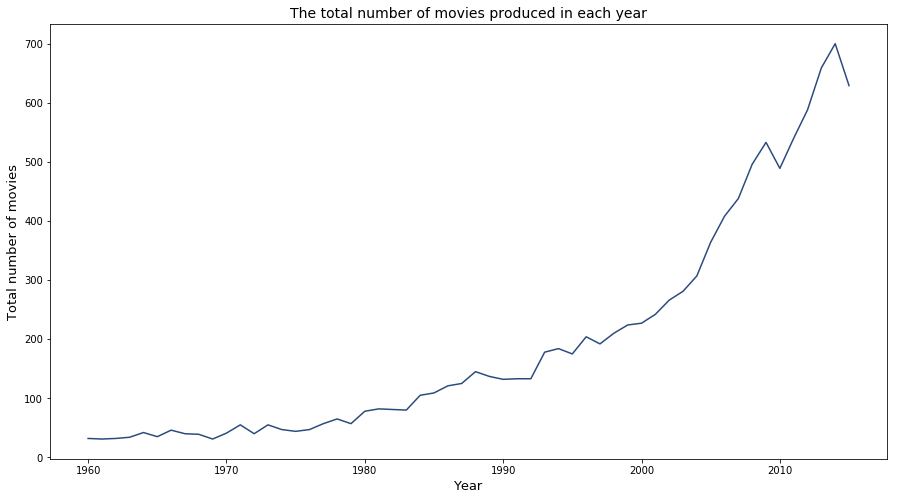

In [187]:
plt.figure(figsize=(15,8))
plt.plot(data, color='#2b4b7c')

plt.xlabel('Year', fontsize = 13)
plt.ylabel('Total number of movies', fontsize = 13)
plt.title('The total number of movies produced in each year', fontsize = 14)

plt.show()

>Here we can observe that movies production is increasing exponentially in each year

In [188]:
highest_profit=df.loc[df.groupby("release_year")["Profit"].idxmax()]

In [189]:
highest_profit

,budget,revenue,original_title,director,tagline,runtime,release_date,release_year,cast_1,cast_2,cast_3,cast_4,cast_5,genre_1,genre_2,genre_3,genre_4,genre_5,Profit
10143,12000000.0,6.000000e+07,Spartacus,Stanley Kubrick,More titanic than any story ever told!,197.0,10/6/60,1960,Kirk Douglas,Laurence Olivier,Jean Simmons,Charles Laughton,Peter Ustinov,Action,Drama,History,None,None,4.800000e+07
10110,4000000.0,2.158800e+08,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,79.0,1/25/61,1961,Rod Taylor,J. Pat O'Malley,Betty Lou Gerson,Martha Wentworth,Ben Wright,Adventure,Animation,Comedy,Family,None,2.118800e+08
9849,1100000.0,5.960000e+07,Dr. No,Terence Young,NOW meet the most extraordinary gentleman spy ...,110.0,10/4/62,1962,Sean Connery,Ursula Andress,Joseph Wiseman,Jack Lord,Bernard Lee,Adventure,Action,Thriller,None,None,5.850000e+07
10438,2500000.0,7.889876e+07,From Russia With Love,Terence Young,The world's masters of murder pull out all the...,115.0,10/11/63,1963,Sean Connery,Daniela Bianchi,Lotte Lenya,Robert Shaw,Bernard Lee,Action,Thriller,Adventure,None,None,7.639876e+07
9881,3500000.0,1.249000e+08,Goldfinger,Guy Hamilton,Everything he touches turns into excitement!,110.0,9/17/64,1964,Sean Connery,Honor Blackman,Gert FrÃ¶be,Shirley Eaton,Tania Mallet,Adventure,Action,Thriller,None,None,1.214000e+08
10690,8200000.0,1.632143e+08,The Sound of Music,Robert Wise,The happiest sound in all the world!,174.0,3/2/65,1965,Julie Andrews,Christopher Plummer,Eleanor Parker,Richard Haydn,Peggy Wood,Drama,Family,Music,Romance,None,1.550143e+08
10822,7500000.0,3.373669e+07,Who's Afraid of Virginia Woolf?,Mike Nichols,You are cordially invited to George and Martha...,131.0,6/21/66,1966,Elizabeth Taylor,Richard Burton,George Segal,Sandy Dennis,Agnes Flanagan,Drama,None,None,None,None,2.623669e+07
10398,4000000.0,2.058436e+08,The Jungle Book,Wolfgang Reitherman,The Jungle is JUMPIN'!,78.0,10/18/67,1967,Phil Harris,Sebastian Cabot,Louis Prima,George Sanders,Sterling Holloway,Family,Animation,Adventure,None,None,2.018436e+08
9719,12000000.0,5.671537e+07,2001: A Space Odyssey,Stanley Kubrick,An epic drama of adventure and exploration,149.0,4/5/68,1968,Keir Dullea,Douglas Rain,Gary Lockwood,William Sylvester,Daniel Richter,Science Fiction,Mystery,Adventure,None,None,4.471537e+07
10725,6000000.0,1.023089e+08,Butch Cassidy and the Sundance Kid,George Roy Hill,"Not that it matters, but most of it is true.",110.0,9/23/69,1969,Paul Newman,Robert Redford,Katharine Ross,Strother Martin,Henry Jones,History,Drama,Western,Crime,None,9.630889e+07


>The highest_profit dataframe has the maximum profit for all the movies grouped by the each year, then i used the function **idxmax()** to get the max value for each year

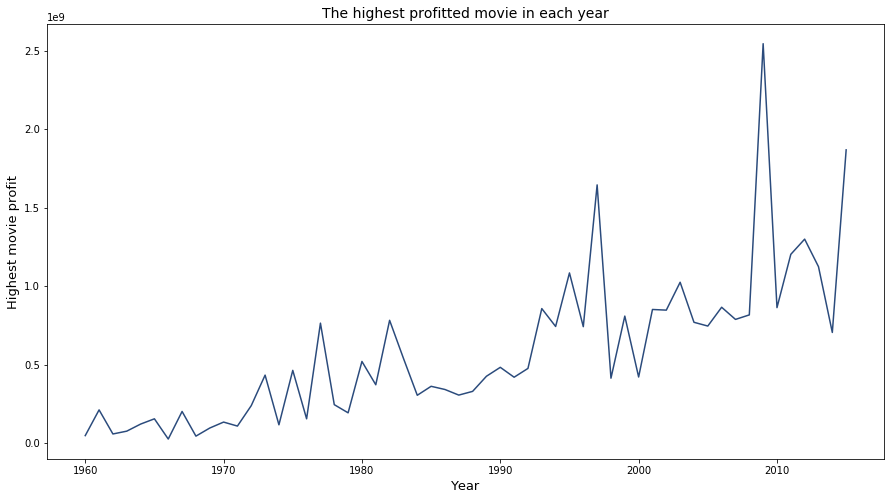

In [190]:
plt.figure(figsize=(15,8))
plt.plot(highest_profit['release_year'],highest_profit['Profit'], color='#2b4b7c')

plt.xlabel('Year', fontsize = 13)
plt.ylabel('Highest movie profit', fontsize = 13)
plt.title('The highest profitted movie in each year', fontsize = 14)

plt.show()

>The highest profitted movie in each year fluctuat but we can notice that in 2014, it increased dramatically, then in 2015 it decreased dramatically

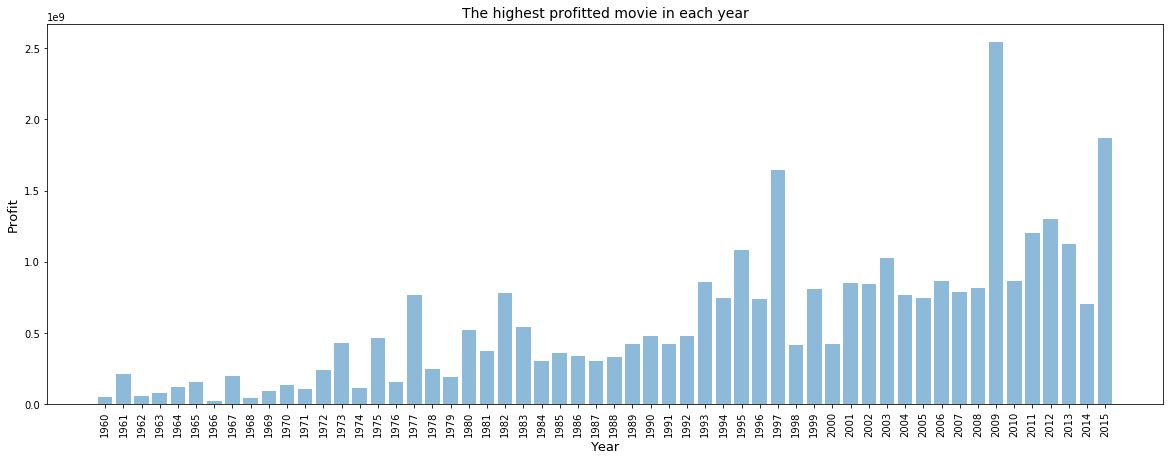

In [191]:
plt.figure(figsize=(20,7))
plt.bar(highest_profit['release_year'], highest_profit['Profit'], align='center', alpha=0.5)
plt.xticks(highest_profit['release_year'], rotation=90)

#plt.annotate(highest_profit['original_title'].iloc[0], xy=(1960, 1960), rotation=90)
#for i in range(len(highest_profit)):
 #   plt.annotate(highest_profit['original_title'].iloc[i], xy=(1960, 1015))
    
plt.ylabel('Profit', fontsize = 13)
plt.xlabel('Year', fontsize = 13)
plt.title('The highest profitted movie in each year', fontsize = 14)
plt.show()

>We can observe that 2014 has the highest movie profit, which is avatar.

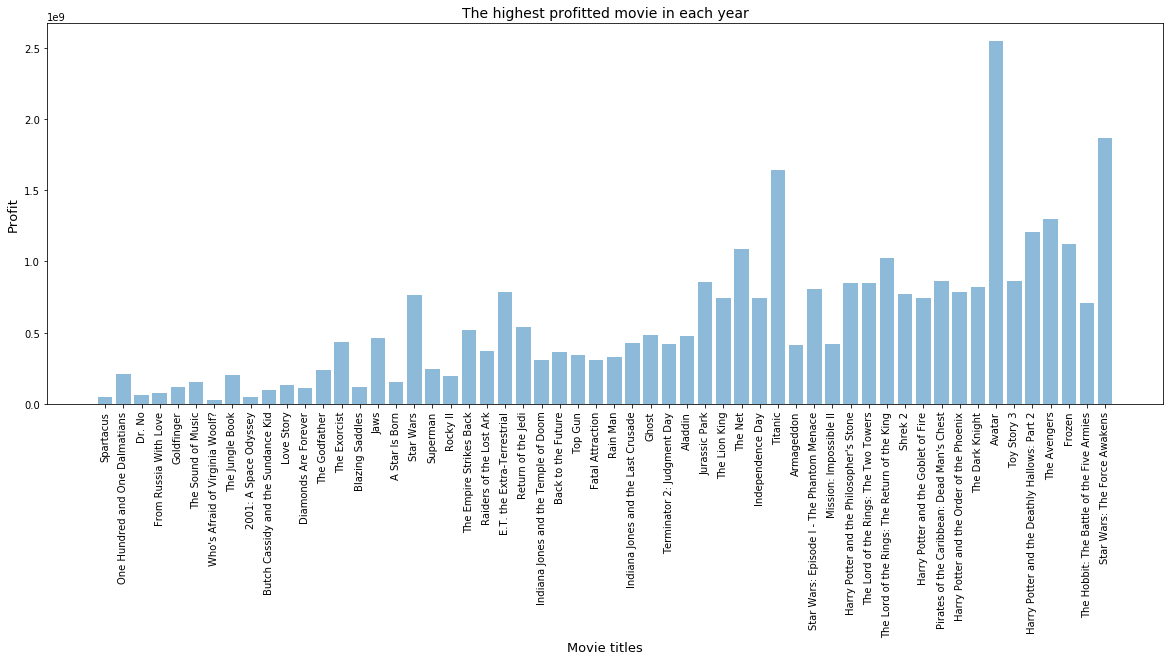

In [192]:
plt.figure(figsize=(20,7))
plt.bar(highest_profit['original_title'], highest_profit['Profit'], align='center', alpha=0.5)
plt.xticks(highest_profit['original_title'], rotation=90)

#plt.annotate(highest_profit['original_title'].iloc[0], xy=(1960, 1960), rotation=90)
#for i in range(len(highest_profit)):
 #   plt.annotate(highest_profit['original_title'].iloc[i], xy=(1960, 1015))
    
plt.ylabel('Profit', fontsize = 13)
plt.xlabel('Movie titles', fontsize = 13)
plt.title('The highest profitted movie in each year', fontsize = 14)
plt.show()

>As we can see that 'Avatar' movie has the highest profit, making over 2.5 Billion dollars

Text(0,0.5,'Average Profit')

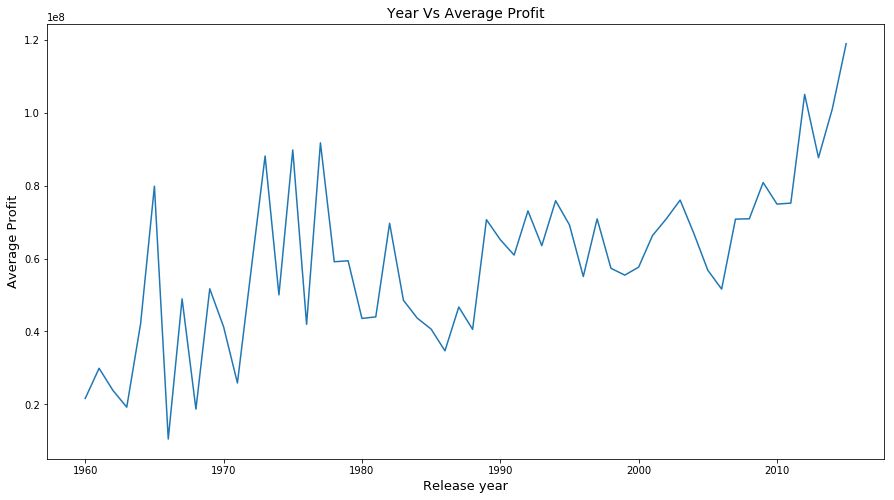

In [193]:
plt.figure(figsize=(15,8))
df.groupby('release_year')['Profit'].mean().plot()

plt.title("Year Vs Average Profit",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)

>Movies profit have increased over the years, but there are fluctuation which is increasing and decreasing. Based on the analysis we can obvserve that not only each year theres a movie with top profit, it depends on the movie title, actors, commercials, and many factors.

>**I remember in 2009 when avatar movie was released, commercials were everywhere(in restaurants, buses, even kids toys and backpack), and the movie trailer was incredible, there are many factors for a movie to gain a lot of profit**

<a id='conclusions'></a>
## Conclusions

• Budget and revenue column has zero values, which makes the analysis unreliable; therefore, i had to change the zero values with NaN values.

• Maximum Number Of Movies Release In year 2014.

• 'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies.

• Short runtime movies are more popular than long runtime movies.

• Average runtime of the movies are decreasing year by year.

• Movies produced between the year 1960 and 1970 has low profit.

• Movies production is increasing exponentially in each year.

• Movie runtime is decreasing from year to the next.

## Limitation

• In the revenue and budget column, many movies have 0 values. Therefore, i changed the 0's to NaN values, but if all movies have revenue and budget values instead of 0's, it would make the analysis more accurate.

• Spliting genres and cast members was a data cleaning process, but what i notice is that many movies have from 1 to 5 genres, some have 2 and the rest of genre 3,4,5 were assigned with the value NONE. I checked the highest genres a movie can have within my dataset, and i found out that the maximum number of genres a movie have is 5, so i split it to 5 columns. Same goes to cast column.

• Some movies runtime have the value of 0, again i didn't drop these rows, instead i changed the value from zero to NaN, using **replace(0, np.NAN)** function.

## Reference

• https://stackoverflow.com/questions/17812978/how-to-plot-two-columns-of-a-pandas-data-frame-using-points

• https://stackoverflow.com/questions/37514686/how-to-plot-a-bar-graph-from-a-pandas-series

• https://www.geeksforgeeks.org/python-pandas-dataframe-plot-bar/

• https://pandas.pydata.org/

• https://plot.ly/pandas/bar-charts/